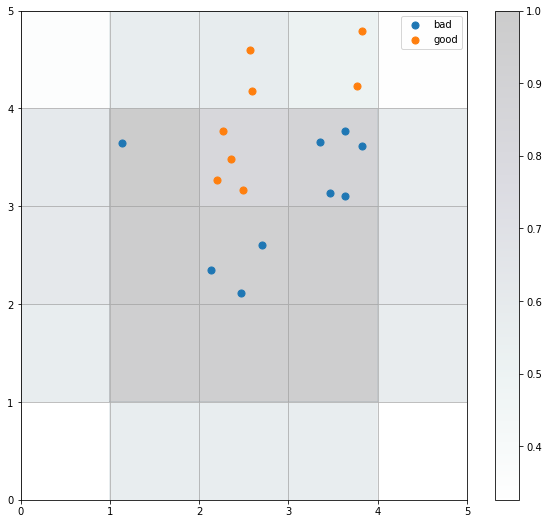

In [21]:
import numpy as np

# 读取3.0α数据集
data_file = open('watermelon3a.csv')
dataset = np.loadtxt(data_file, delimiter=",")

class  MinMaxScaler:
    def __init__(self):
        self.min_ = None
        self.max_ = None
    def fit(self,X):
        '''根据训练数据集X获得数据的最小值和最大值'''
        self.min_ = np.array([np.min(X[:,i]) for i in range(X.shape[1])])
        self.max_ = np.array([np.max(X[:,i]) for i in range(X.shape[1])])
        return self
    def transform(self,X):
        '''将X根据MinMaxScaler进行最值归一化处理'''
        resX = np.empty(shape=X.shape,dtype=float)
        for col in range(X.shape[1]):
            resX[:,col] = (X[:,col]-self.min_[col]) / (self.max_[col]-self.min_[col])
        return resX
#分割训练数据和标签
data = dataset[:,1:3]
label = dataset[:,3]

#对训练数据归一化处理
MinMaxScaler = MinMaxScaler()
MinMaxScaler.fit(data)
data = MinMaxScaler.transform(data)

import matplotlib.pyplot as plt
%matplotlib inline

#导入外部的MiniSom作为SOM的实现类
from minisom import MiniSom   
import pickle
# 使用默认的高斯函数作为邻域函数
som = MiniSom(5, 5, 2, sigma=0.5, learning_rate=0.6)
som.pca_weights_init(data)
som.train(data,100)

# 得到数据对应的竞争层节点，并画出它们的位置
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
label_names = {0:'bad', 1:'good'}
for c in np.unique(label):
    idx_target = label==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[int(c)], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()



In [2]:
y=[1.0,2.0] 
print(int(y))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'